##**1. Data Cleaning**

    IMPORTING THE RELEVANT LIBRARIES

In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns

# Importing the necessary functions and modules
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt

# Importing the classifiers
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA



DATA ASLI

In [62]:
# Load dataset and create a DataFrame
# Specify the file path of the CSV file
file_path = "C:/Users/pingk/OneDrive - Chulalongkorn University/Documents/mekargit/zaytalnakhil-1/20240429_databasah_csv.csv"

# Load the dataset into a DataFrame
df = pd.read_csv(file_path)

# Display the DataFrame only 6 first row (use head for the first 6 rows, and tail for the last 6 rows)
df.head(6)


C:\Users\pingk\AppData\Local\Temp\ipykernel_22152\1662164226.py:6: DtypeWarning: Columns (3367,3369) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


,Datapoints,3225.795591,3226.297348,3226.799261,3227.30133,3227.803556,3228.305938,3228.808476,3229.311171,3229.814022,...,countrycode,countrytarget,provincecode,yymm,yy,mm,ftirrun_yyyy,ftirrun_mmm,ftirrun_m,ftirrun_yymm
0,absorbance_Fri Mar 08 10_46_59 2024_TH-CPN-005...,0.004393,0.004496,0.004647,0.004797,0.004890,0.004878,0.004733,0.004461,0.004096,...,TH,0,CPN,2311,23,11,2024,Mar,3,2403
1,absorbance_Fri Mar 08 10_49_06 2024_TH-CPN-005...,0.004996,0.005020,0.005068,0.005098,0.005065,0.004930,0.004673,0.004306,0.003863,...,TH,0,CPN,2311,23,11,2024,Mar,3,2403
2,absorbance_Fri Mar 08 10_50_57 2024_TH-CPN-005...,0.003594,0.003403,0.003151,0.002869,0.002573,0.002268,0.001962,0.001675,0.001440,...,TH,0,CPN,2311,23,11,2024,Mar,3,2403
3,absorbance_Fri Mar 08 10_51_30 2024_TH-CPN-005...,0.004154,0.004115,0.003974,0.003771,0.003545,0.003316,0.003093,0.002885,0.002702,...,TH,0,CPN,2311,23,11,2024,Mar,3,2403
4,absorbance_Fri Mar 08 10_52_01 2024_TH-CPN-005...,0.004019,0.003930,0.003819,0.003692,0.003547,0.003379,0.003192,0.002997,0.002818,...,TH,0,CPN,2311,23,11,2024,Mar,3,2403
5,absorbance_Fri Mar 08 10_52_43 2024_TH-CPN-005...,0.005993,0.005933,0.005833,0.005723,0.005619,0.005523,0.005431,0.005343,0.005266,...,TH,0,CPN,2311,23,11,2024,Mar,3,2403


In [63]:
# Display the missing values in the DataFrame
df.isnull().sum()


Datapoints      0
3225.795591     0
3226.297348     0
3226.799261     0
3227.30133      0
               ..
mm              0
ftirrun_yyyy    0
ftirrun_mmm     0
ftirrun_m       0
ftirrun_yymm    0
Length: 3374, dtype: int64

In [64]:
# Display the data types of the columns in the DataFrame
df.dtypes

Datapoints       object
3225.795591     float64
3226.297348     float64
3226.799261     float64
3227.30133      float64
                 ...   
mm               object
ftirrun_yyyy      int64
ftirrun_mmm      object
ftirrun_m         int64
ftirrun_yymm      int64
Length: 3374, dtype: object

In [65]:
# Display data description
df.describe(include='all')


,Datapoints,3225.795591,3226.297348,3226.799261,3227.30133,3227.803556,3228.305938,3228.808476,3229.311171,3229.814022,...,countrycode,countrytarget,provincecode,yymm,yy,mm,ftirrun_yyyy,ftirrun_mmm,ftirrun_m,ftirrun_yymm
count,1869,1869.000000,1869.000000,1869.000000,1869.000000,1869.000000,1869.000000,1869.000000,1869.000000,1869.000000,...,1869,1869.000000,1869,1869.0,1869.000000,1869.0,1869.000000,1869,1869.000000,1869.000000
unique,1869,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3,NaN,29,22.0,NaN,18.0,NaN,3,NaN,NaN
top,absorbance_Fri Mar 08 10_46_59 2024_TH-CPN-005...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,TH,NaN,SNI,2312.0,NaN,12.0,NaN,Mar,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1125,NaN,335,536.0,NaN,536.0,NaN,1383,NaN,NaN
mean,NaN,0.001674,0.001679,0.001689,0.001700,0.001713,0.001726,0.001738,0.001748,0.001755,...,NaN,0.431782,NaN,NaN,22.980738,NaN,2023.841091,NaN,3.895666,2388.004815
std,NaN,0.003487,0.003489,0.003478,0.003457,0.003428,0.003394,0.003360,0.003329,0.003303,...,NaN,0.559401,NaN,NaN,1.525533,NaN,0.365689,NaN,1.809246,34.785662
min,NaN,-0.050460,-0.050317,-0.049868,-0.049178,-0.048354,-0.047510,-0.046745,-0.046119,-0.045645,...,NaN,0.000000,NaN,NaN,20.000000,NaN,2023.000000,NaN,3.000000,2308.000000
25%,NaN,0.000638,0.000639,0.000624,0.000645,0.000660,0.000676,0.000692,0.000724,0.000754,...,NaN,0.000000,NaN,NaN,23.000000,NaN,2024.000000,NaN,3.000000,2403.000000
50%,NaN,0.002041,0.002050,0.002026,0.002025,0.002014,0.002001,0.001985,0.001984,0.001989,...,NaN,0.000000,NaN,NaN,23.000000,NaN,2024.000000,NaN,3.000000,2403.000000
75%,NaN,0.003053,0.003077,0.003056,0.003076,0.003085,0.003111,0.003100,0.003103,0.003112,...,NaN,1.000000,NaN,NaN,23.000000,NaN,2024.000000,NaN,4.000000,2403.000000


In [66]:
# Drop columns that are not needed
df_new = df.drop(['Datapoints',
                    'samplecode', 
                    'countrycode',
                    'provincecode', 
                    'yymm', 
                    'yy',
                    'mm',
                    'ftirrun_yyyy',
                    'ftirrun_mmm',
                    'ftirrun_m',
                    'ftirrun_yymm'],
                    axis=1)
df_new

,3225.795591,3226.297348,3226.799261,3227.30133,3227.803556,3228.305938,3228.808476,3229.311171,3229.814022,3230.31703,...,15296.35997,15307.6488,15318.9543,15330.27651,15341.61547,15352.97122,15364.34379,15375.73322,15387.13955,countrytarget
0,0.004393,0.004496,0.004647,0.004797,0.004890,0.004878,0.004733,0.004461,0.004096,0.003698,...,0.017438,0.019063,0.020884,0.022496,0.023560,0.023910,0.023575,0.022735,0.021611,0
1,0.004996,0.005020,0.005068,0.005098,0.005065,0.004930,0.004673,0.004306,0.003863,0.003403,...,0.016140,0.017375,0.018717,0.020097,0.021393,0.022464,0.023180,0.023461,0.023297,0
2,0.003594,0.003403,0.003151,0.002869,0.002573,0.002268,0.001962,0.001675,0.001440,0.001306,...,0.022086,0.022069,0.022105,0.021981,0.021515,0.020615,0.019312,0.017765,0.016203,0
3,0.004154,0.004115,0.003974,0.003771,0.003545,0.003316,0.003093,0.002885,0.002702,0.002565,...,0.021070,0.019918,0.019159,0.018762,0.018584,0.018422,0.018057,0.017335,0.016211,0
4,0.004019,0.003930,0.003819,0.003692,0.003547,0.003379,0.003192,0.002997,0.002818,0.002683,...,0.015772,0.015563,0.016039,0.016881,0.017657,0.017966,0.017539,0.016355,0.014635,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1864,0.003384,0.003551,0.003662,0.003714,0.003716,0.003689,0.003658,0.003645,0.003662,0.003706,...,0.016078,0.015783,0.014816,0.013412,0.011928,0.010690,0.009904,0.009578,0.009564,0
1865,0.004059,0.003997,0.003848,0.003643,0.003430,0.003259,0.003167,0.003170,0.003260,0.003407,...,0.023679,0.023296,0.022183,0.020519,0.018626,0.016843,0.015449,0.014542,0.014042,0
1866,0.002439,0.002526,0.002592,0.002653,0.002721,0.002801,0.002886,0.002961,0.003013,0.003033,...,0.021880,0.021557,0.020385,0.018496,0.016248,0.014117,0.012594,0.011999,0.012405,0
1867,0.003070,0.003137,0.003172,0.003163,0.003114,0.003040,0.002963,0.002906,0.002883,0.002896,...,0.020242,0.019905,0.019131,0.017997,0.016741,0.015654,0.014982,0.014790,0.014949,0


In [67]:
# Display the values of the new DataFrame
df_new.head()

,3225.795591,3226.297348,3226.799261,3227.30133,3227.803556,3228.305938,3228.808476,3229.311171,3229.814022,3230.31703,...,15296.35997,15307.6488,15318.9543,15330.27651,15341.61547,15352.97122,15364.34379,15375.73322,15387.13955,countrytarget
0,0.004393,0.004496,0.004647,0.004797,0.004890,0.004878,0.004733,0.004461,0.004096,0.003698,...,0.017438,0.019063,0.020884,0.022496,0.023560,0.023910,0.023575,0.022735,0.021611,0
1,0.004996,0.005020,0.005068,0.005098,0.005065,0.004930,0.004673,0.004306,0.003863,0.003403,...,0.016140,0.017375,0.018717,0.020097,0.021393,0.022464,0.023180,0.023461,0.023297,0
2,0.003594,0.003403,0.003151,0.002869,0.002573,0.002268,0.001962,0.001675,0.001440,0.001306,...,0.022086,0.022069,0.022105,0.021981,0.021515,0.020615,0.019312,0.017765,0.016203,0
3,0.004154,0.004115,0.003974,0.003771,0.003545,0.003316,0.003093,0.002885,0.002702,0.002565,...,0.021070,0.019918,0.019159,0.018762,0.018584,0.018422,0.018057,0.017335,0.016211,0
4,0.004019,0.003930,0.003819,0.003692,0.003547,0.003379,0.003192,0.002997,0.002818,0.002683,...,0.015772,0.015563,0.016039,0.016881,0.017657,0.017966,0.017539,0.016355,0.014635,0


In [68]:
# Display data information
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1869 entries, 0 to 1868
Columns: 3363 entries, 3225.795591 to countrytarget
dtypes: float64(3362), int64(1)
memory usage: 48.0 MB


In [69]:
# Dimensions of the data
df_new.shape

(1869, 3363)

##**2. Data Correlation**

In [70]:
# Display the number of unique values in the DataFrame
df_new.nunique()

3225.795591      1844
3226.297348      1846
3226.799261      1848
3227.30133       1841
3227.803556      1850
                 ... 
15352.97122      1855
15364.34379      1856
15375.73322      1851
15387.13955      1857
countrytarget       3
Length: 3363, dtype: int64

In [71]:
# Display data correlation
df_new.corr()

,3225.795591,3226.297348,3226.799261,3227.30133,3227.803556,3228.305938,3228.808476,3229.311171,3229.814022,3230.31703,...,15296.35997,15307.6488,15318.9543,15330.27651,15341.61547,15352.97122,15364.34379,15375.73322,15387.13955,countrytarget
3225.795591,1.000000,0.998941,0.995963,0.991497,0.986078,0.980209,0.974354,0.968954,0.964365,0.960836,...,-0.516189,-0.512283,-0.508123,-0.504586,-0.502183,-0.500857,-0.500081,-0.499192,-0.497658,0.026956
3226.297348,0.998941,1.000000,0.998974,0.996061,0.991640,0.986153,0.980107,0.974066,0.968553,0.963993,...,-0.517155,-0.512738,-0.508117,-0.504234,-0.501641,-0.500285,-0.499613,-0.498909,-0.497588,0.025340
3226.799261,0.995963,0.998974,1.000000,0.998988,0.996083,0.991572,0.985891,0.979639,0.973455,0.967937,...,-0.516274,-0.511440,-0.506475,-0.502375,-0.499717,-0.498443,-0.497960,-0.497501,-0.496426,0.024864
3227.30133,0.991497,0.996061,0.998988,1.000000,0.998983,0.995998,0.991305,0.985420,0.979007,0.972785,...,-0.513790,-0.508684,-0.503533,-0.499366,-0.496771,-0.495674,-0.495441,-0.495254,-0.494426,0.025584
3227.803556,0.986078,0.991640,0.996083,0.998983,1.000000,0.998944,0.995823,0.990957,0.984916,0.978445,...,-0.510236,-0.505044,-0.499889,-0.495813,-0.493399,-0.492548,-0.492590,-0.492663,-0.492048,0.027396
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15352.97122,-0.500857,-0.500285,-0.498443,-0.495674,-0.492548,-0.489640,-0.487417,-0.486110,-0.485686,-0.485878,...,0.893366,0.924098,0.953348,0.977788,0.994168,1.000000,0.994075,0.977015,0.950952,0.014544
15364.34379,-0.500081,-0.499613,-0.497960,-0.495441,-0.492590,-0.489942,-0.487929,-0.486757,-0.486385,-0.486556,...,0.862101,0.891465,0.922503,0.952282,0.977272,0.994075,1.000000,0.994040,0.976889,0.019102
15375.73322,-0.499192,-0.498909,-0.497501,-0.495254,-0.492663,-0.490227,-0.488346,-0.487216,-0.486802,-0.486876,...,0.833701,0.859368,0.889117,0.920856,0.951391,0.977015,0.994040,1.000000,0.994004,0.019820
15387.13955,-0.497658,-0.497588,-0.496426,-0.494426,-0.492048,-0.489760,-0.487944,-0.486792,-0.486289,-0.486239,...,0.809636,0.830263,0.856391,0.886982,0.919638,0.950952,0.976889,0.994004,1.000000,0.016643


##**3. Classification Algorthms**

In [72]:
# Splitting the dataset into training and testing sets
X = df_new.drop('countrytarget', axis=1)
y = df_new['countrytarget']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

RANDOM FOREST CLASSIFIER

Random Forest Classifier Performance:
Accuracy: 0.80
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.93      0.86       215
           1       0.80      0.69      0.74       145
           2       0.00      0.00      0.00        14

    accuracy                           0.80       374
   macro avg       0.53      0.54      0.53       374
weighted avg       0.77      0.80      0.78       374



C:\Users\pingk\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\pingk\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\pingk\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result)

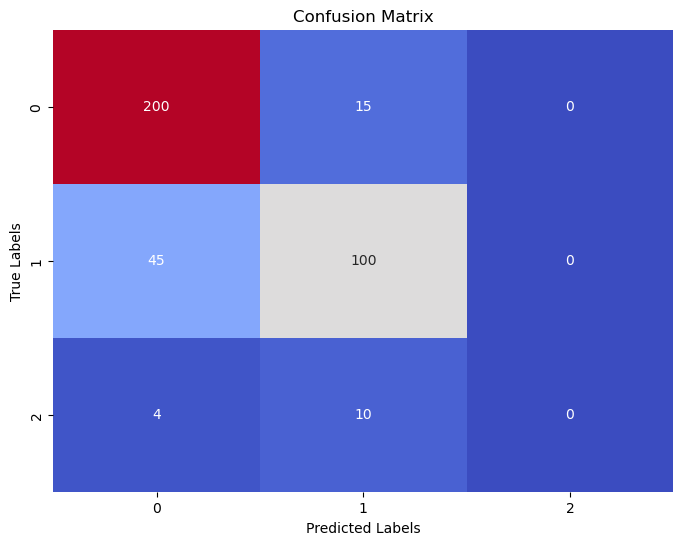

In [73]:
# Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)

# Creating the pipeline
rf_pipeline = make_pipeline(StandardScaler(), rf_model)

# Training the model
rf_pipeline.fit(X_train, y_train)

# Making predictions
y_pred_rf = rf_pipeline.predict(X_test)

# Calculating performance metrics
accuracy_rf = accuracy_score(y_test, y_pred_rf)
report_rf = classification_report(y_test, y_pred_rf)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)

# Displaying the results
print(f"Random Forest Classifier Performance:\nAccuracy: {accuracy_rf:.2f}\nClassification Report:\n{report_rf}")

# Displaying the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_rf, annot=True, cmap='coolwarm', fmt='d', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


SUPPORT VECTOR MACHINE (SVM) CLASSIFIER

Support Vector Machine (SVM) Classifier Performance:
Accuracy: 0.75
Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.96      0.82       215
           1       0.87      0.52      0.66       145
           2       0.00      0.00      0.00        14

    accuracy                           0.75       374
   macro avg       0.53      0.49      0.49       374
weighted avg       0.75      0.75      0.73       374



C:\Users\pingk\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\pingk\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\pingk\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result)

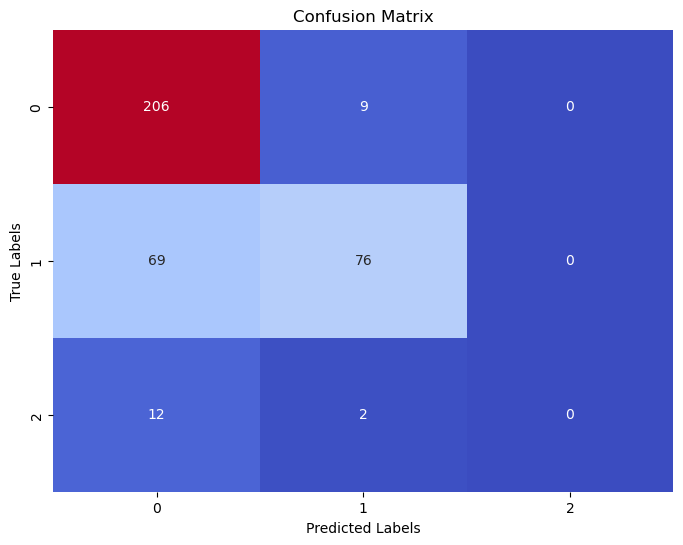

In [74]:
# Support Vector Machine (SVM) Classifier
svm_model = SVC(random_state=42)

# Creating the pipeline
svm_pipeline = make_pipeline(StandardScaler(), svm_model)

# Training the model
svm_pipeline.fit(X_train, y_train)

# Making predictions
y_pred_svm = svm_pipeline.predict(X_test)

# Calculating performance metrics
accuracy_svm = accuracy_score(y_test, y_pred_svm)
report_svm = classification_report(y_test, y_pred_svm)
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)

# Displaying the results
print(f"Support Vector Machine (SVM) Classifier Performance:\nAccuracy: {accuracy_svm:.2f}\nClassification Report:\n{report_svm}")

# Displaying the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_svm, annot=True, cmap='coolwarm', fmt='d', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


K-NEAREST NEIGHBORS (KNN) CLASSIFIER

In [75]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier

# Create the KNeighborsClassifier object
#knn = KNeighborsClassifier()

# Create the pipeline
#knn_pipeline = make_pipeline(StandardScaler(), knn)

# Train the model
#knn_pipeline.fit(X_train, y_train)

# Make predictions
#y_pred_knn = knn_pipeline.predict(X_test)

# Calculate performance metrics
#accuracy_knn = accuracy_score(y_test, y_pred_knn)
#report_knn = classification_report(y_test, y_pred_knn)
#conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)

# Display the results
#print(f"K-Nearest Neighbors (KNN) Classifier Performance:\nAccuracy: {accuracy_knn:.2f}\nClassification Report:\n{report_knn}")

# Display the confusion matrix
#plt.figure(figsize=(8, 6))
#sns.heatmap(conf_matrix_knn, annot=True, cmap='coolwarm', fmt='d', cbar=False)
#plt.xlabel('Predicted Labels')
#plt.ylabel('True Labels')
#plt.title('Confusion Matrix')
#plt.show()

LOGISTIC REGRESSION CLASSIFIER

Logistic Regression Performance:
Accuracy: 0.79
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.85      0.83       215
           1       0.75      0.74      0.74       145
           2       1.00      0.50      0.67        14

    accuracy                           0.79       374
   macro avg       0.86      0.70      0.75       374
weighted avg       0.80      0.79      0.79       374



C:\Users\pingk\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


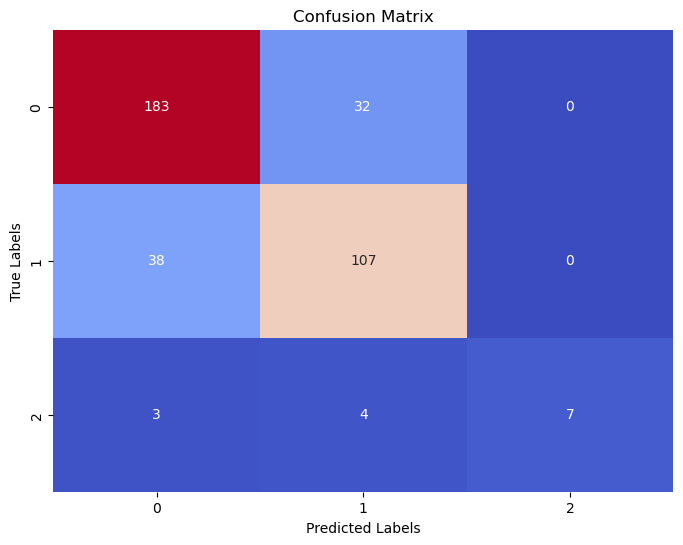

In [76]:
from sklearn.linear_model import LogisticRegression

# Create an instance of LogisticRegression classifier
logreg = LogisticRegression(max_iter=1000, random_state=42)

# Create a pipeline
logreg_pipeline = make_pipeline(StandardScaler(), logreg)

# Train the model
logreg_pipeline.fit(X_train, y_train)

# Make predictions
y_pred_logreg = logreg_pipeline.predict(X_test)

# Calculate performance metrics
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
report_logreg = classification_report(y_test, y_pred_logreg)
conf_matrix_logreg = confusion_matrix(y_test, y_pred_logreg)

# Display the results
print(f"Logistic Regression Performance:\nAccuracy: {accuracy_logreg:.2f}\nClassification Report:\n{report_logreg}")

# Display the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_logreg, annot=True, cmap='coolwarm', fmt='d', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

DECISION TREE CLASSIFIER

Decision Tree Classifier Performance:
Accuracy: 0.63
Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.73      0.71       215
           1       0.57      0.54      0.56       145
           2       0.18      0.14      0.16        14

    accuracy                           0.63       374
   macro avg       0.48      0.47      0.48       374
weighted avg       0.63      0.63      0.63       374



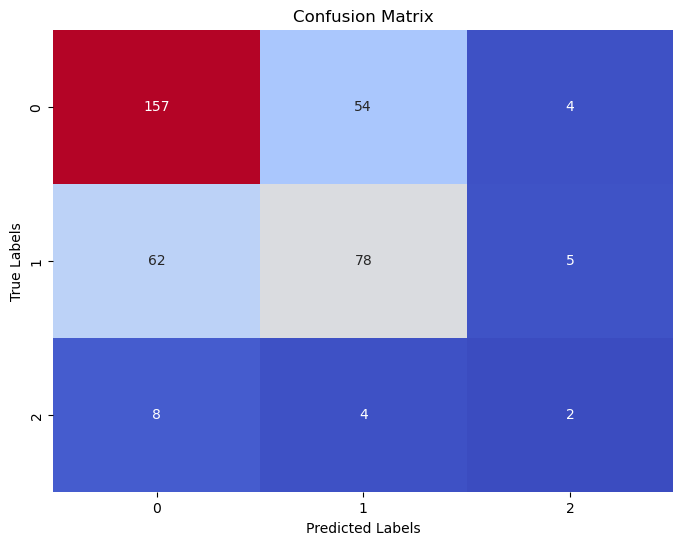

In [77]:

# Decision Tree Classifier
dt_model = DecisionTreeClassifier(random_state=42)

# Creating the pipeline
dt_pipeline = make_pipeline(StandardScaler(), dt_model)

# Training the model
dt_pipeline.fit(X_train, y_train)

# Making predictions
y_pred_dt = dt_pipeline.predict(X_test)

# Calculating performance metrics
accuracy_dt = accuracy_score(y_test, y_pred_dt)
report_dt = classification_report(y_test, y_pred_dt)
conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)

# Displaying the results
print(f"Decision Tree Classifier Performance:\nAccuracy: {accuracy_dt:.2f}\nClassification Report:\n{report_dt}")

# Displaying the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_dt, annot=True, cmap='coolwarm', fmt='d', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


LIBRARY OF CLASSIFIERS

In [78]:
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import SGDClassifier

# Dictionary to store the models and their names
models = {
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Support Vector Machine': SVC(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    #'K-Nearest Neighbors': KNeighborsClassifier(),
    'Logistic Regression': LogisticRegression(max_iter=10000, random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'AdaBoost': AdaBoostClassifier(random_state=42),
    'Gaussian Naive Bayes': GaussianNB(),
    'Linear Discriminant Analysis': LinearDiscriminantAnalysis(),
    'SGD Classifier': SGDClassifier(random_state=42)
}

# Splitting the dataset into training and testing sets
X = df_new.drop('countrytarget', axis=1)
y = df_new['countrytarget']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Dictionary to store the performance metrics
performance_metrics = {}

# Training and evaluating the models
for name, model in models.items():
    # Making pipelines for standardization and model training
    pipeline = make_pipeline(StandardScaler(), model)

    # Training the model
    pipeline.fit(X_train, y_train)

    # Making predictions
    y_pred = pipeline.predict(X_test)

    # Calculating performance metrics
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)

    # Storing the metrics
    performance_metrics[name] = {
        'Accuracy': accuracy,
        'Precision': report['weighted avg']['precision'],
        'Recall': report['weighted avg']['recall'],
        'F1 Score': report['weighted avg']['f1-score']
    }

# Converting performance metrics to a DataFrame for better visualization
performance_df = pd.DataFrame(performance_metrics).T

# Displaying the performance metrics
performance_df.sort_values(by='Accuracy', ascending=False)

C:\Users\pingk\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\pingk\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\pingk\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result)

,Accuracy,Precision,Recall,F1 Score
Gradient Boosting,0.807487,0.805527,0.807487,0.799037
Random Forest,0.803922,0.812916,0.803922,0.788345
Linear Discriminant Analysis,0.798574,0.802907,0.798574,0.799700
Logistic Regression,0.789661,0.792267,0.789661,0.788613
SGD Classifier,0.789661,0.793459,0.789661,0.785407
Support Vector Machine,0.723708,0.726314,0.723708,0.684721
Decision Tree,0.686275,0.684338,0.686275,0.685256
AdaBoost,0.609626,0.623464,0.609626,0.606063
Gaussian Naive Bayes,0.563280,0.465220,0.563280,0.441939


In [79]:
from sklearn.decomposition import PCA

# Splitting the dataset into training and testing sets
X = df_new.drop('countrytarget', axis=1)
y = df_new['countrytarget']
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X, y, test_size=0.3, random_state=42)

# Dictionary to store the performance metrics
performance_metrics = {}

# Training and evaluating the models
for name, model in models.items():
    # Making pipelines for standardization, PCA, and model training
    pipeline2 = make_pipeline(StandardScaler(), PCA(n_components=10), model)

    # Training the model
    pipeline2.fit(X_train_pca, y_train_pca)

    # Making predictions
    y_pred_pca = pipeline2.predict(X_test_pca)

    # Calculating performance metrics
    accuracy = accuracy_score(y_test_pca, y_pred_pca)
    report = classification_report(y_test_pca, y_pred_pca, output_dict=True)

    # Storing the metrics
    performance_metrics[name] = {
        'Accuracy': accuracy,
        'Precision': report['weighted avg']['precision'],
        'Recall': report['weighted avg']['recall'],
        'F1 Score': report['weighted avg']['f1-score']
    }

# Converting performance metrics to a DataFrame for better visualization
performance_df_pca = pd.DataFrame(performance_metrics).T

# Displaying the performance metrics
performance_df_pca.sort_values(by='Accuracy', ascending=False)

C:\Users\pingk\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\pingk\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\pingk\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result)

,Accuracy,Precision,Recall,F1 Score
Random Forest,0.768271,0.735560,0.768271,0.749259
Gradient Boosting,0.720143,0.708996,0.720143,0.701420
Decision Tree,0.698752,0.696498,0.698752,0.697484
AdaBoost,0.614973,0.617063,0.614973,0.611655
Gaussian Naive Bayes,0.602496,0.577643,0.602496,0.504103
Support Vector Machine,0.588235,0.557921,0.588235,0.445179
Logistic Regression,0.586453,0.533762,0.586453,0.484732
Linear Discriminant Analysis,0.572193,0.475255,0.572193,0.447176
SGD Classifier,0.522282,0.534345,0.522282,0.522098


PCA Scatter Plot for each model

1. Logistic Regression Model

2. Decision Tree Model


3. Random Forest Model


4. Support Vector Machine (SVM) Model

5. Gradient Boosting Model

6. SGD Classifier Model

7. Gaussian NB Model

8. AdaBoost Model

9. K-Nearest Neighbors (KNN) Model

TRIAL OF Orthogonal partial least squares-discriminant analysis (OPLS-DA)

Defaulting to user installation because normal site-packages is not writeable
R^2Y(cum): 0.06577620946130147
Q^2(cum): -0.2509171557210117


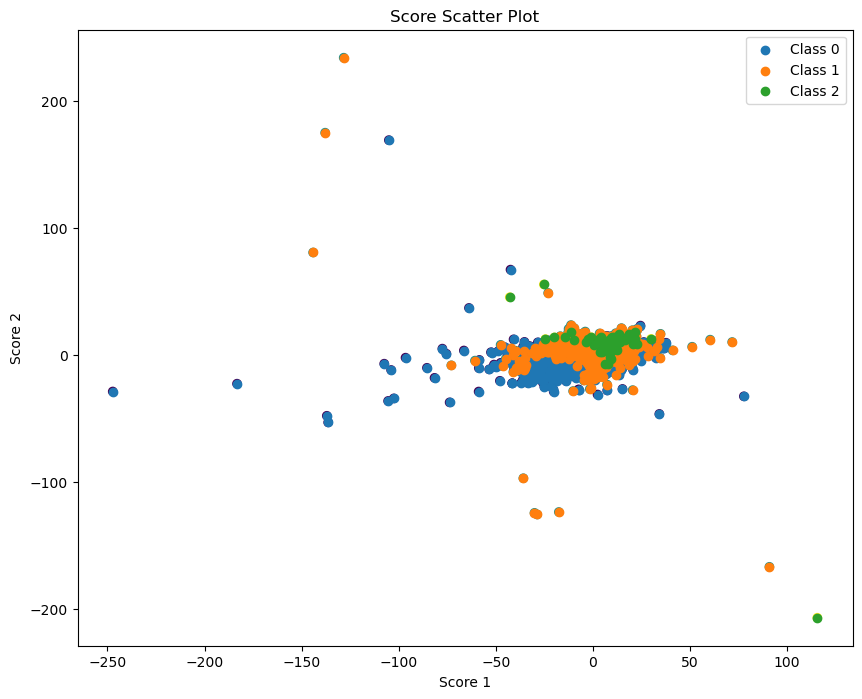

In [81]:
!pip install pyopls

from pyopls import OPLS
from sklearn.preprocessing import StandardScaler
from sklearn.cross_decomposition import PLSRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_predict
import matplotlib.pyplot as plt
import numpy as np

# Assuming X and y are your data
X = df_new.drop('countrytarget', axis=1)
y = df_new['countrytarget']

# Standardize the data
scaler = StandardScaler()
X_scaled_opls = scaler.fit_transform(X)
y_scaled_opls = scaler.fit_transform(y.values.reshape(-1, 1))

# Create an OPLS model with one predictive component and one orthogonal component
opls = OPLS(1)

# Remove the orthogonal signal
X_opls = opls.fit_transform(X_scaled_opls, y_scaled_opls)

# Now, you can use the filtered data in any classifier, for example, PLSRegression
pls2 = PLSRegression(n_components=2)
pls2.fit(X_opls, y_scaled_opls)

# Predict the response variable
y_pred_opls = pls2.predict(X_opls)

# Calculate R^2Y
R2Y = r2_score(y_scaled_opls, y_pred_opls)


# Calculate Q^2 using cross-validation
y_cv_opls = cross_val_predict(pls2, X_opls, y_scaled_opls, cv=10)
Q2 = r2_score(y_scaled_opls, y_cv_opls)

# Print the results
print(f"R^2Y(cum): {R2Y}")
print(f"Q^2(cum): {Q2}")

# Get the unique class labels in your data
classes = np.unique(y)

# Plot the scores
plt.figure(figsize=(10, 8))
plt.scatter(pls2.x_scores_[:, 0], pls2.x_scores_[:, 1], c=y)

# Assuming 'classes' is a list of unique class labels in your data
for i, class_label in enumerate(classes):
    plt.scatter(pls2.x_scores_[y == class_label, 0], pls2.x_scores_[y == class_label, 1], label=f'Class {class_label}')


plt.xlabel('Score 1')
plt.ylabel('Score 2')
plt.title('Score Scatter Plot')
plt.legend()  # Add a legend instead of a colorbar
plt.show()

Hierarchical Cluster Analysis (HCA) on the OPLS-DA scores

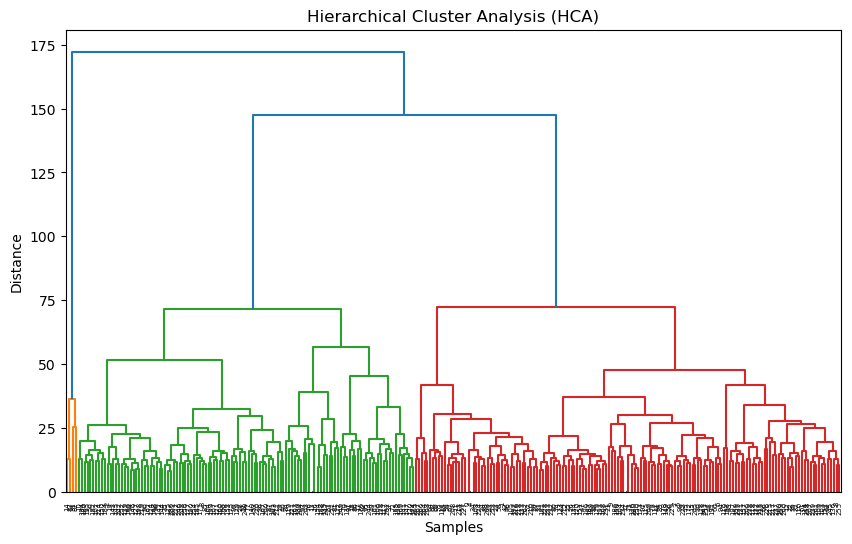

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

# Perform hierarchical clustering
Z = linkage(X_opls, method='ward')

# Plot the dendrogram
plt.figure(figsize=(10, 6))
dendrogram(Z)
plt.title('Hierarchical Cluster Analysis (HCA)')
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.show()
